In [2]:
!pip install control
import control as ct
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 9.5 MB/s eta 0:00:00


In [5]:
#Constantes RLC
R = 5
L = 0.1
C = 220e-6

#Constantes PID
Kp = 10
Ki = 1000
Kd = 0.05

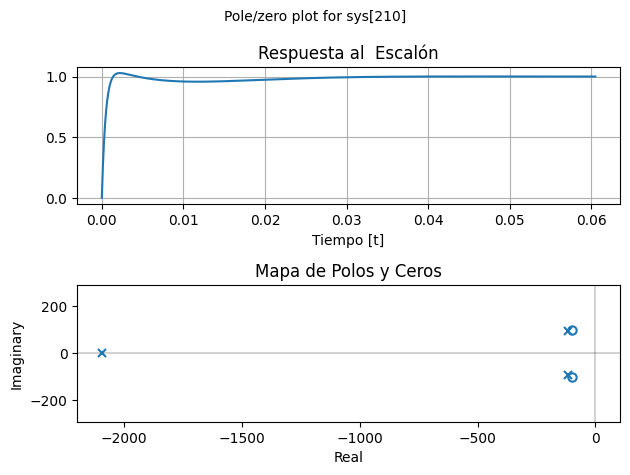

In [31]:
#Sistema RLC
num = 1/(L*C)
den = [1, R/L, 1/(L*C)]
sys = ct.tf(num, den)

#Proporcional
sys_p = ct.tf(Kp, 1)

#Integral
sys_i = ct.tf(Ki, [1, 0])

#Derivativo
sys_d = ct.tf([Kd, 0], 1)

PID = ct.parallel(ct.parallel(sys_p, sys_i), sys_d)
sys_ol = ct.series(PID, sys)
sys_fb = ct.feedback(sys_ol, 1)

plt.figure()
plt.subplot(2,1,1)
plt.grid()
plt.title("Respuesta al  Escalón")
plt.xlabel("Tiempo [t]")
[t1, y1] = ct.step_response(sys_fb)
plt.plot(t1,y1)
plt.subplot(2,1,2)
plt.title("Mapa de Polos y Ceros")
plt.xlabel("Real")
plt.ylabel("Imaginario")
ct.pzmap(sys_fb)
plt.tight_layout()
